In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funcs import *
from logisticregressionClass import *
np.random.seed(0)

## 构造数据

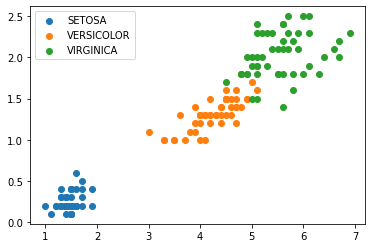

In [2]:
data = pd.read_csv('data/iris.csv')
iris_types = np.unique(data['class'].values)

# 选取两个特征 - 方便绘图
x_axis = 'petal_length'
y_axis = 'petal_width'

for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],\
        data[y_axis][data['class']==iris_type],label=iris_type)
    plt.legend()

In [3]:
def test():
    partial_data = data[:5]
    print(partial_data)
    setosa =  partial_data[:5]['class']=='SETOSA'
    print(setosa),print(type(setosa))
test()

   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  SETOSA
1           4.9          3.0           1.4          0.2  SETOSA
2           4.7          3.2           1.3          0.2  SETOSA
3           4.6          3.1           1.5          0.2  SETOSA
4           5.0          3.6           1.4          0.2  SETOSA
0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool
<class 'pandas.core.series.Series'>


In [4]:
#　切分测试集和训练集
train_data = data.sample(frac = 0.8)
test_data = data.drop(train_data.index)
X_train = train_data[[x_axis,y_axis]].values
y_train = train_data[['class']].values
X_test = test_data[[x_axis,y_axis]].values
y_test = test_data[['class']].values

## 关闭多项式训练

In [5]:
# 迭代参数
max_iters = 1500
alpha = 0.1
polynomial_degree = 1

# 训练
logistic =LogisticRegressionMultiClass(polynomial_degree=polynomial_degree, standarscaler=True)
logistic.fit(X_train,y_train,alpha=alpha, iters=max_iters)
y_test_pre = logistic.predict(X_test)
# 训练集的精确度
print(logistic.accuracy(y_test,y_test_pre))
y_test_pre[:10]

0.9


array([['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA'],
       ['SETOSA']], dtype=object)

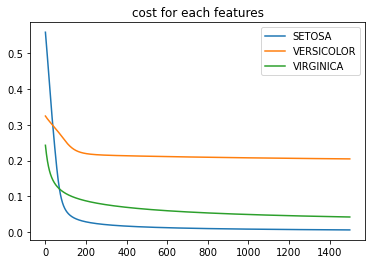

In [6]:
# 绘制每个特征的cost
# 获得unique_label_list
cost_dict = logistic.train_cost_hist
unique_label_list = np.unique(y_train)
for each_label in cost_dict:
    plt.plot(range(len(cost_dict[each_label])), cost_dict[each_label],label=each_label)
plt.legend()
plt.title("cost for each features")
plt.show()

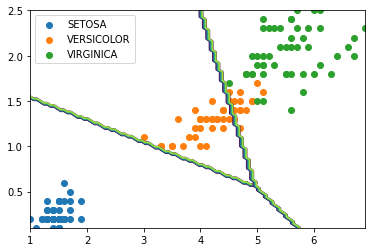

In [7]:
# 绘制决策边界
samples = 100
x_min = np.min(X_train[:,0])
x_max = np.max(X_train[:,0])
y_min = np.min(X_train[:,1])
y_max = np.max(X_train[:,1])

x_mesh = np.linspace(x_min, x_max, samples)
y_mesh = np.linspace(y_min, y_max, samples)

z_dict = {}
z_dict[unique_label_list[0]] = np.zeros((samples,samples))
z_dict[unique_label_list[1]] = np.zeros((samples,samples))
z_dict[unique_label_list[2]] = np.zeros((samples,samples))
for x_index,x in enumerate(x_mesh):
    for y_index,y in enumerate(y_mesh):
        feature = np.array([[x,y]])
        predict = logistic.predict(feature)[0][0]
        z_dict[predict][x_index,y_index] = 1


for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],\
        data[y_axis][data['class']==iris_type],label=iris_type)
    plt.legend()
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[0]])
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[1]])
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[2]])

## 开启多项式训练

In [8]:
# 迭代参数
max_iters = 800
alpha = 0.1
polynomial_degree = 2

# 训练
logistic =LogisticRegressionMultiClass(polynomial_degree=polynomial_degree, standarscaler=True)
logistic.fit(X_train,y_train,alpha=alpha, iters=max_iters)
y_test_pre = logistic.predict(X_test)
# 训练集的精确度
print(logistic.accuracy(y_test,y_test_pre))

0.9333333333333333


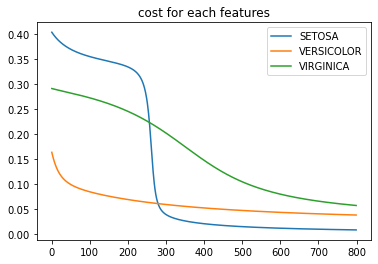

In [9]:
# 绘制每个特征的cost
# 获得unique_label_list
cost_dict = logistic.train_cost_hist
unique_label_list = np.unique(y_train)
for each_label in cost_dict:
    plt.plot(range(len(cost_dict[each_label])), cost_dict[each_label],label=each_label)
plt.legend()
plt.title("cost for each features")
plt.show()

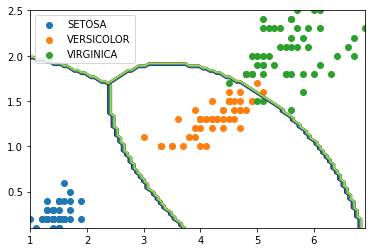

In [10]:
# 绘制决策边界
samples = 100
x_min = np.min(X_train[:,0])
x_max = np.max(X_train[:,0])
y_min = np.min(X_train[:,1])
y_max = np.max(X_train[:,1])

x_mesh = np.linspace(x_min, x_max, samples)
y_mesh = np.linspace(y_min, y_max, samples)

z_dict = {}
z_dict[unique_label_list[0]] = np.zeros((samples,samples))
z_dict[unique_label_list[1]] = np.zeros((samples,samples))
z_dict[unique_label_list[2]] = np.zeros((samples,samples))
for x_index,x in enumerate(x_mesh):
    for y_index,y in enumerate(y_mesh):
        feature = np.array([[x,y]])
        predict = logistic.predict(feature)[0][0]
        z_dict[predict][x_index,y_index] = 1


for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],\
        data[y_axis][data['class']==iris_type],label=iris_type)
    plt.legend()
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[0]])
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[1]])
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[2]])

## 其他数据集测试

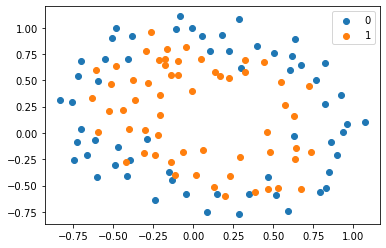

In [11]:
data = pd.read_csv("./data/microchips-tests.csv")

# 标签类别
validities = [0,1]

# 选取特征
x_axis = 'param_1'
y_axis = 'param_2'

for validity in validities:
    plt.scatter(data[x_axis][data['validity']==validity],\
        data[y_axis][data['validity']==validity],label=validity)
    plt.legend()

In [12]:
# 分割训练集测试集
train_data = data.sample(frac = 0.8)
test_data = data.drop(train_data.index)
X_train = train_data[[x_axis,y_axis]].values
y_train = train_data[['validity']].values
X_test = test_data[[x_axis,y_axis]].values
y_test = test_data[['validity']].values

In [14]:
# 迭代参数
max_iters = 2000
alpha = 0.1
polynomial_degree = 6

# 训练
logistic =LogisticRegressionMultiClass(polynomial_degree=polynomial_degree, standarscaler=True)
logistic.fit(X_train,y_train,alpha=alpha, iters=max_iters)
y_test_pre = logistic.predict(X_test)
# 训练集的精确度
print(logistic.accuracy(y_test,y_test_pre))

0.9166666666666666


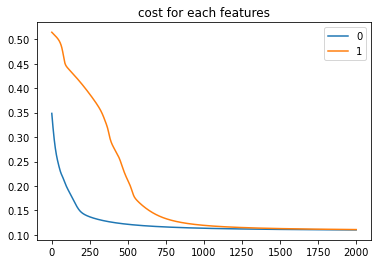

In [ ]:
# 绘制每个特征的cost
# 获得unique_label_list
cost_dict = logistic.train_cost_hist
unique_label_list = np.unique(y_train)
for each_label in cost_dict:
    plt.plot(range(len(cost_dict[each_label])), cost_dict[each_label],label=each_label)
plt.legend()
plt.title("cost for each features")
plt.show()

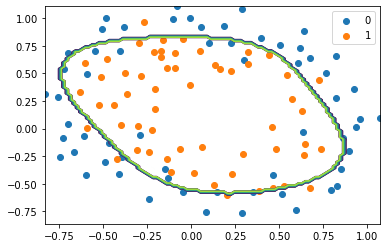

In [ ]:
samples = 100
x_min = np.min(X_train[:,0])
x_max = np.max(X_train[:,0])
y_min = np.min(X_train[:,1])
y_max = np.max(X_train[:,1])

x_mesh = np.linspace(x_min, x_max, samples)
y_mesh = np.linspace(y_min, y_max, samples)

z_dict = {}
z_dict[unique_label_list[0]] = np.zeros((samples,samples))
z_dict[unique_label_list[1]] = np.zeros((samples,samples))
for x_index,x in enumerate(x_mesh):
    for y_index,y in enumerate(y_mesh):
        feature = np.array([[x,y]])
        predict = logistic.predict(feature)[0][0]
        z_dict[predict][x_index,y_index] = 1

for validity in validities:
    plt.scatter(data[x_axis][data['validity']==validity],\
        data[y_axis][data['validity']==validity],label=validity)
    plt.legend()

plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[0]])
plt.contour(x_mesh, y_mesh, z_dict[unique_label_list[1]])